In [1]:
import torch
import torchvision
import torch.nn
import torch.nn as nn
import torch.optim as optim
import numpy as np
# colab 사용 시
from google.colab import drive
drive.mount('/content/drive')

# cuda 사용가능 여부 확인
torch.cuda.is_available()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


True

In [2]:
import os

# 작업 디렉토리를 원하는 경로로 변경
os.chdir('/content/drive/MyDrive/dscd')

# 현재 작업 디렉토리 확인
print(os.getcwd())


/content/drive/MyDrive/dscd


In [3]:
import torch
import torchvision
import torch.nn
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datapreprocess import create_dataloaders
from algorithm import TeamTransformer




In [4]:
## colab 사용 시
# from google.colab import drive
# drive.mount('/content/drive')

# # cuda 사용가능 여부 확인
# torch.cuda.is_available()

#cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 하이퍼파라미터 설정
# 1. 데이터 관련
embedding_dim = 19  # 각 팀원의 임베딩 크기
seq_len = 5  # 팀원 조합 크기
output_dim = 1  # 예측할 점수 (연속적인 값)

# 2. 모델 관련
n_heads = 1  # 멀티헤드 어텐션의 헤드 수 (embedding_dim의 약수로 설정)
n_layers = 3  # 트랜스포머 인코더 레이어 수 (모델의 깊이를 적절하게 설정)
hidden_dim = 64  # 피드포워드 네트워크의 히든 레이어 크기 (embedding_dim보다 크게 설정하여 모델 용량 증가)
dropout_rate = 0.2  # 드롭아웃 비율 (오버피팅 방지를 위해 설정)
epochs = 10

In [5]:
# 데이터 경로
data_path = "final.npy"

# 원하는 배치 크기
batch_size = 512

# DataLoader 생성
train_loader, val_loader = create_dataloaders(data_path, batch_size)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1, Batch 1, Train Loss: 4241.5419921875, Validation Loss: 4198.328125
Epoch 1, Batch 1001, Train Loss: 1650.6241998358087, Validation Loss: 1642.2284727906372
Epoch 1, Batch 2001, Train Loss: 845.6035096208076, Validation Loss: 839.1898533040913
Epoch 1, Batch 3001, Train Loss: 572.3562561862669, Validation Loss: 567.0571700302373
Epoch 1, Batch 4001, Train Loss: 435.039935184699, Validation Loss: 430.23856812505477
Epoch 1 - Train Loss: 374.4323075033292, Validation Loss: 369.8222084448199
최적의 모델 파라미터가 에포크 1에서 저장되었습니다 (Validation Loss: 369.8222084448199)


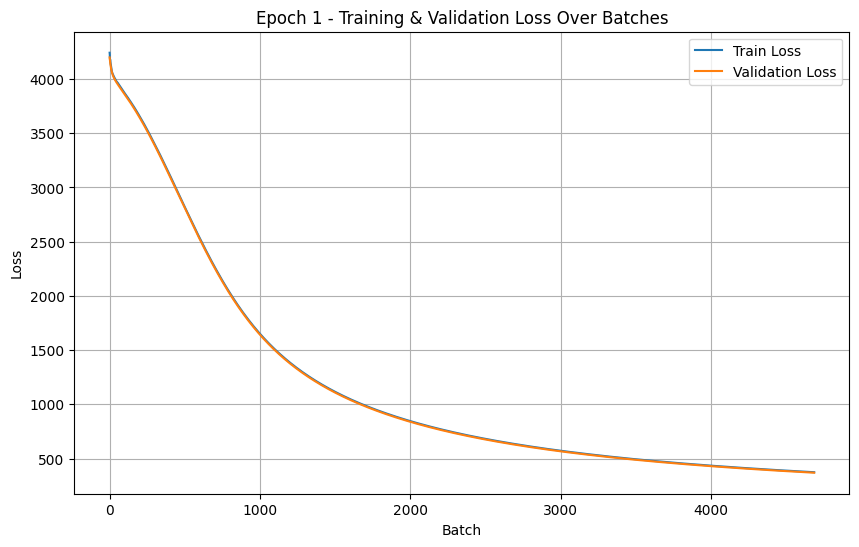

Epoch 2, Batch 1, Train Loss: 21.42839813232422, Validation Loss: 17.592334747314453
Epoch 2, Batch 1001, Train Loss: 20.513854342145283, Validation Loss: 17.095803017859215
Epoch 2, Batch 2001, Train Loss: 20.066301902016065, Validation Loss: 16.721125775250954
Epoch 2, Batch 3001, Train Loss: 19.656521102818836, Validation Loss: 16.45445546401576
Epoch 2, Batch 4001, Train Loss: 19.29789276571162, Validation Loss: 16.243066580347406
Epoch 2 - Train Loss: 19.07259439567657, Validation Loss: 16.088796276688168
최적의 모델 파라미터가 에포크 2에서 저장되었습니다 (Validation Loss: 16.088796276688168)


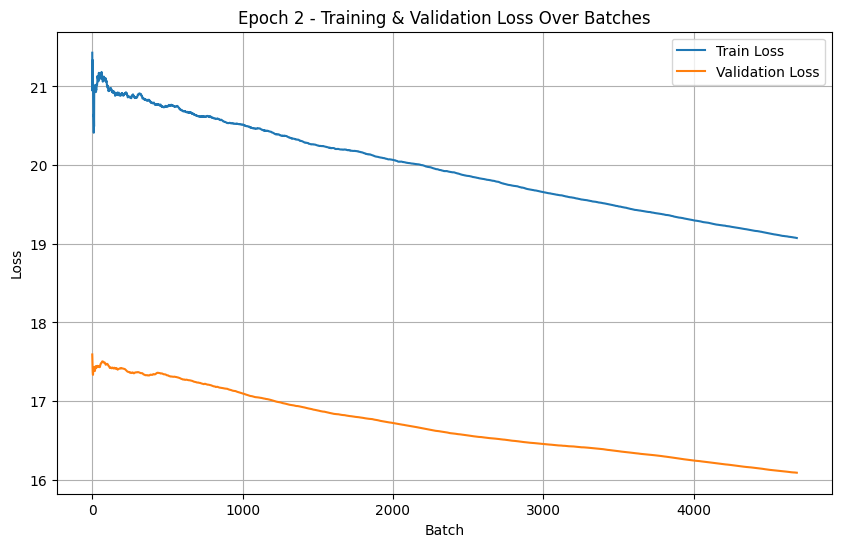

Epoch 3, Batch 1, Train Loss: 16.27619171142578, Validation Loss: 15.13089370727539
Epoch 3, Batch 1001, Train Loss: 17.230002020265196, Validation Loss: 14.744728012161179
Epoch 3, Batch 2001, Train Loss: 17.00511777383098, Validation Loss: 14.513476945113563
Epoch 3, Batch 3001, Train Loss: 16.856142320858563, Validation Loss: 14.284446763658634
Epoch 3, Batch 4001, Train Loss: 16.673271111981983, Validation Loss: 14.036432183763141
Epoch 3 - Train Loss: 16.567171055709135, Validation Loss: 13.904147955337889
최적의 모델 파라미터가 에포크 3에서 저장되었습니다 (Validation Loss: 13.904147955337889)


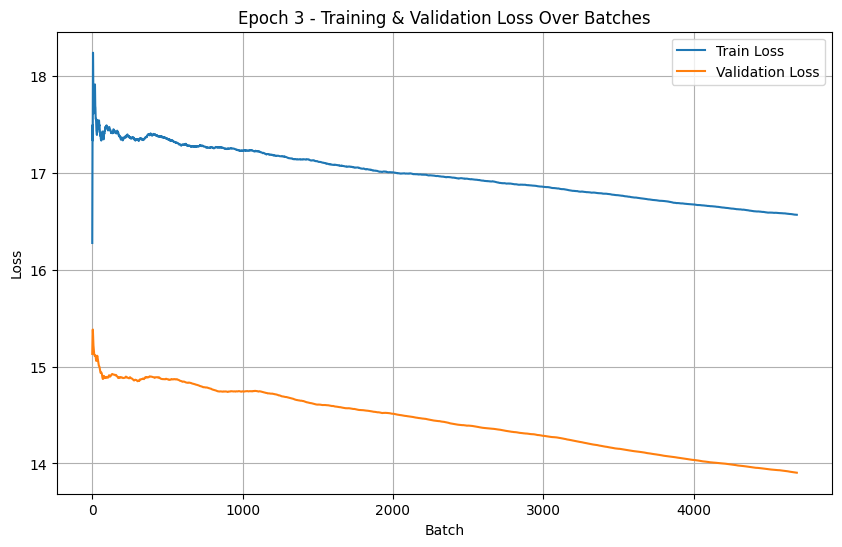

Epoch 4, Batch 1, Train Loss: 16.64991569519043, Validation Loss: 12.743181228637695
Epoch 4, Batch 1001, Train Loss: 15.719727143660172, Validation Loss: 12.748748702126425
Epoch 4, Batch 2001, Train Loss: 15.559783200154836, Validation Loss: 12.610405387668715
Epoch 4, Batch 3001, Train Loss: 15.415254818841005, Validation Loss: 12.443075487670084
Epoch 4, Batch 4001, Train Loss: 15.32462395599144, Validation Loss: 12.308990291403818
Epoch 4 - Train Loss: 15.256020336631215, Validation Loss: 12.232929582075048
최적의 모델 파라미터가 에포크 4에서 저장되었습니다 (Validation Loss: 12.232929582075048)


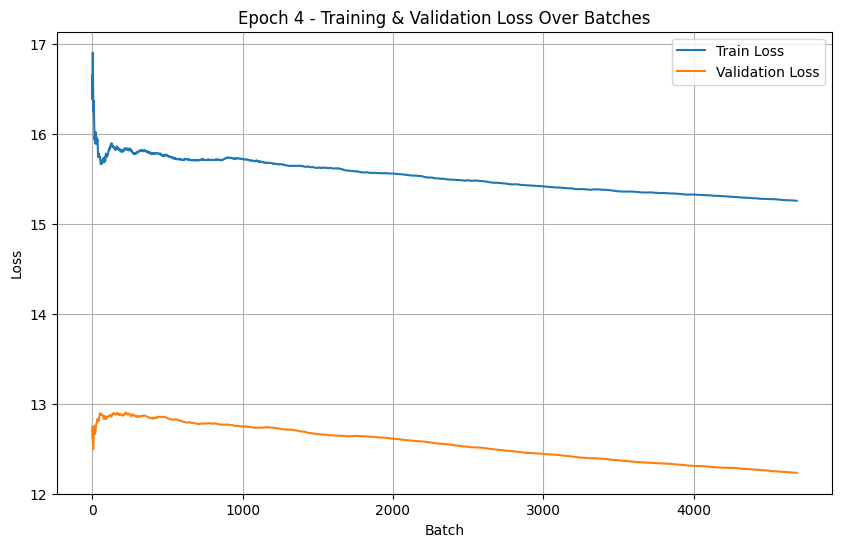

Epoch 5, Batch 1, Train Loss: 14.68945598602295, Validation Loss: 12.056596755981445
Epoch 5, Batch 1001, Train Loss: 14.695113663192277, Validation Loss: 11.486728236630007
Epoch 5, Batch 2001, Train Loss: 14.589298648634056, Validation Loss: 11.461572800559559
Epoch 5, Batch 3001, Train Loss: 14.52396800064397, Validation Loss: 11.385118368823145
Epoch 5, Batch 4001, Train Loss: 14.44164157467942, Validation Loss: 11.302619266200143
Epoch 5 - Train Loss: 14.39849584155522, Validation Loss: 11.257579084549342
최적의 모델 파라미터가 에포크 5에서 저장되었습니다 (Validation Loss: 11.257579084549342)


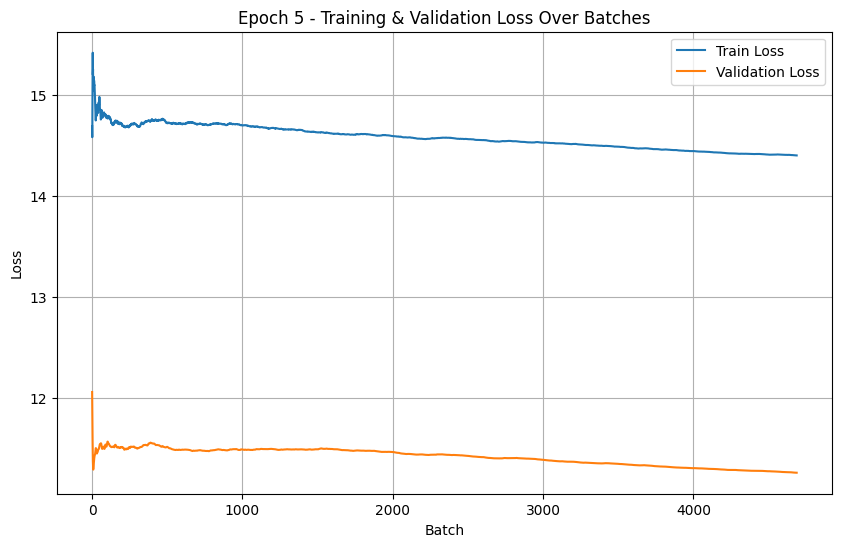

Epoch 6, Batch 1, Train Loss: 15.085563659667969, Validation Loss: 11.109749794006348
Epoch 6, Batch 1001, Train Loss: 13.985775790371738, Validation Loss: 10.839261437986757
Epoch 6, Batch 2001, Train Loss: 13.918170999491709, Validation Loss: 10.751428015526386
Epoch 6, Batch 3001, Train Loss: 13.86557382935089, Validation Loss: 10.678418174420782
Epoch 6, Batch 4001, Train Loss: 13.811256632033778, Validation Loss: 10.617498888608308
Epoch 6 - Train Loss: 13.772580955012259, Validation Loss: 10.58492917249634
최적의 모델 파라미터가 에포크 6에서 저장되었습니다 (Validation Loss: 10.58492917249634)


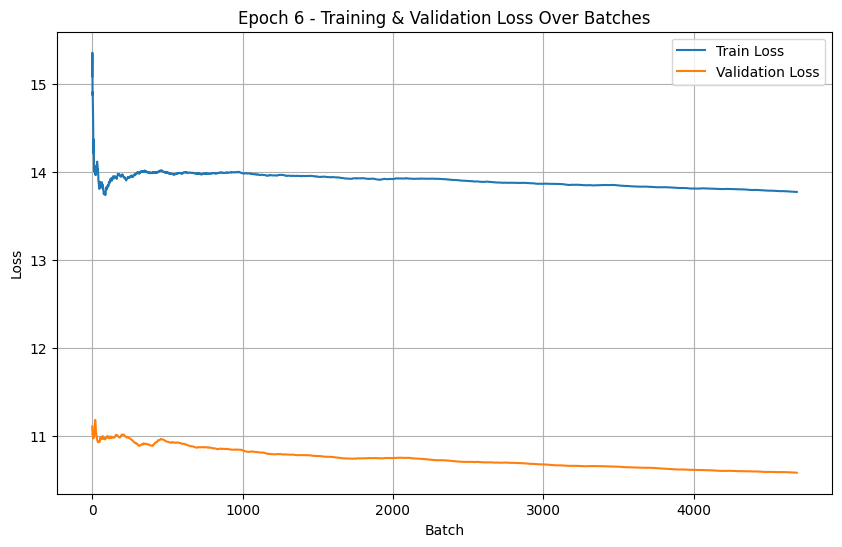

Epoch 7, Batch 1, Train Loss: 15.238377571105957, Validation Loss: 10.1220064163208
Epoch 7, Batch 1001, Train Loss: 13.513725396993753, Validation Loss: 10.428916772047838
Epoch 7, Batch 2001, Train Loss: 13.465332878166173, Validation Loss: 10.400657247269768
Epoch 7, Batch 3001, Train Loss: 13.428713541752257, Validation Loss: 10.381379209491103
Epoch 7, Batch 4001, Train Loss: 13.372743100531249, Validation Loss: 10.332518815696314
Epoch 7 - Train Loss: 13.35122712683759, Validation Loss: 10.321928369714131
최적의 모델 파라미터가 에포크 7에서 저장되었습니다 (Validation Loss: 10.321928369714131)


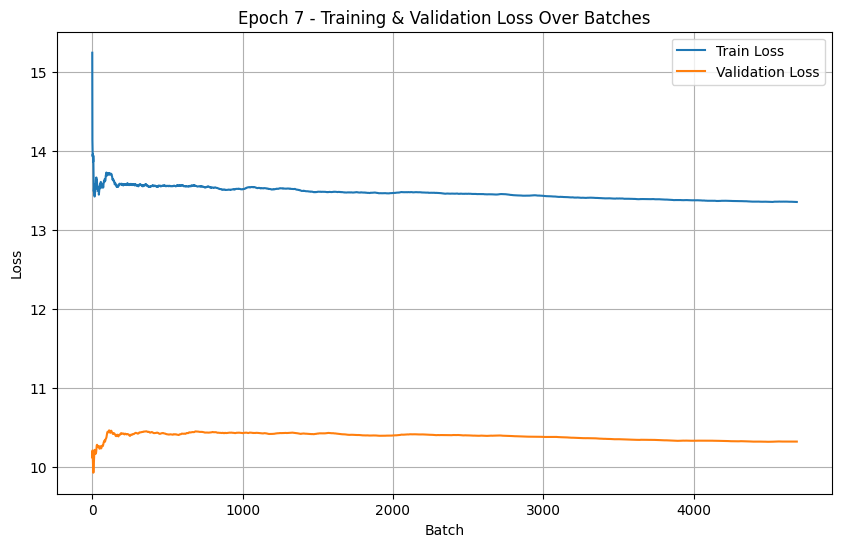

Epoch 8, Batch 1, Train Loss: 13.243941307067871, Validation Loss: 10.200834274291992
Epoch 8, Batch 1001, Train Loss: 13.115237968665856, Validation Loss: 10.132493328738523
Epoch 8, Batch 2001, Train Loss: 13.08152516587623, Validation Loss: 10.176742441710205
Epoch 8, Batch 3001, Train Loss: 13.047662261484941, Validation Loss: 10.166026056944947
Epoch 8, Batch 4001, Train Loss: 13.00744110761479, Validation Loss: 10.155692256411681
Epoch 8 - Train Loss: 12.981126365401233, Validation Loss: 10.16865484340199
최적의 모델 파라미터가 에포크 8에서 저장되었습니다 (Validation Loss: 10.16865484340199)


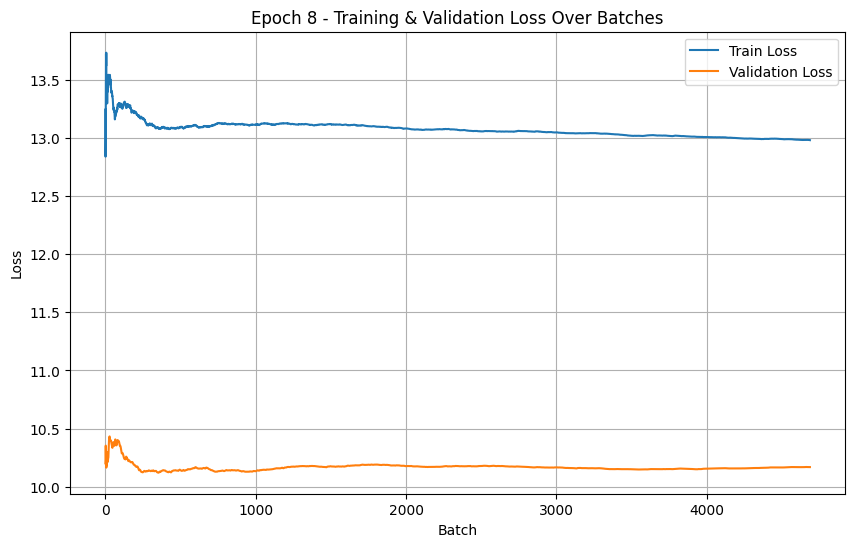

Epoch 9, Batch 1, Train Loss: 11.691143035888672, Validation Loss: 10.013351440429688
Epoch 9, Batch 1001, Train Loss: 12.773304537221506, Validation Loss: 10.108475516487907
Epoch 9, Batch 2001, Train Loss: 12.76821339553383, Validation Loss: 10.121496902115043
Epoch 9, Batch 3001, Train Loss: 12.75104566591257, Validation Loss: 10.13391891029508
Epoch 9, Batch 4001, Train Loss: 12.714183310871272, Validation Loss: 10.131748307916231
Epoch 9 - Train Loss: 12.693933019052187, Validation Loss: 10.118764991239477
최적의 모델 파라미터가 에포크 9에서 저장되었습니다 (Validation Loss: 10.118764991239477)


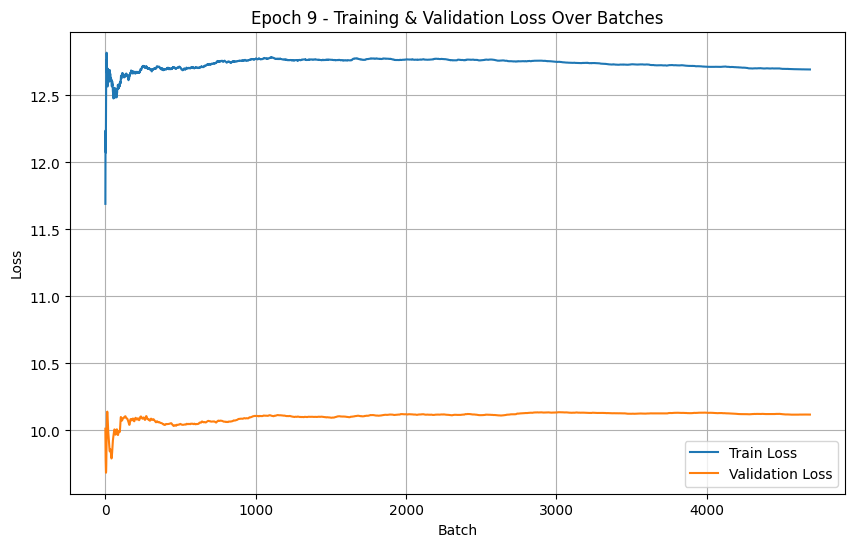

Epoch 10, Batch 1, Train Loss: 12.316205978393555, Validation Loss: 10.061904907226562
Epoch 10, Batch 1001, Train Loss: 12.464499827031489, Validation Loss: 10.02177259043142
Epoch 10, Batch 2001, Train Loss: 12.483960840834314, Validation Loss: 10.07618863459887
Epoch 10, Batch 3001, Train Loss: 12.46691164069476, Validation Loss: 10.099747474095855
Epoch 10, Batch 4001, Train Loss: 12.449437543053355, Validation Loss: 10.092165229261532
Epoch 10 - Train Loss: 12.434424377342133, Validation Loss: 10.093980543645982
최적의 모델 파라미터가 에포크 10에서 저장되었습니다 (Validation Loss: 10.093980543645982)


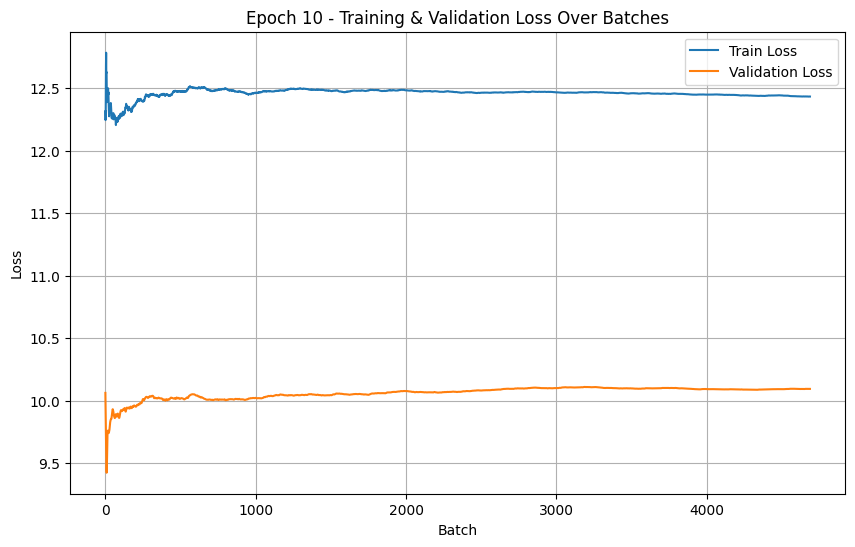

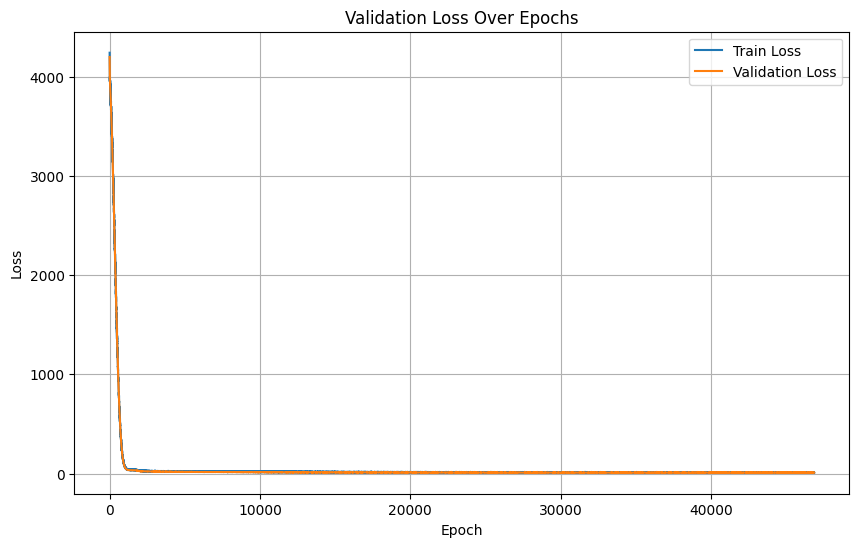

In [6]:

# 모델 초기화
model = TeamTransformer(embedding_dim, n_heads, hidden_dim, n_layers, output_dim, dropout_rate).to(device)

# 손실 함수 및 옵티마이저 설정
criterion = nn.MSELoss()  # 연속적인 점수 예측이므로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)



# 손실 기록 리스트
train_losses = []
val_losses = []
transformer_out_list = []
best_val_loss = float('inf')  # 초기화

# 학습 및 검증 루프
for epoch in range(epochs):
    # 각 에포크마다 새로운 리스트로 초기화 (각 에포크별로 그래프를 그리기 위함)
    epoch_train_losses = []
    epoch_val_losses = []  # validation 배치 손실 기록

    model.train()
    total_train_loss = 0
    total_val_loss = 0  # Validation 손실 초기화

    # Training & Validation Loop
    for batch_idx, (batch_inputs_total, batch_targets) in enumerate(train_loader):
        batch_inputs= batch_inputs_total[:, :, :-1]
        batch_inputs_num= batch_inputs_total[:, :, -1]

        # Training Step
        batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
        optimizer.zero_grad()
        output, _ = model(batch_inputs)


        # 타겟에서 팀원 제외하고 점수만 받기
        batch_targets = batch_targets[:, 0]

        # Train 손실 계산 및 역전파
        train_loss = criterion(output, batch_targets)
        train_loss.backward()
        optimizer.step()
        total_train_loss += train_loss.item()

        # Validation Step
        model.eval()
        with torch.no_grad():
            # val_inputs, val_targets = next(iter(val_loader))  # Validation 데이터를 매 배치마다 하나 가져옴
            # val_inputs, val_targets = val_inputs.to(device), val_targets.to(device)
            # val_output, transformer_out = model(val_inputs)
            val_inputs_total, val_targets = next(iter(val_loader))  # Validation 데이터를 매 배치마다 하나 가져옴
            val_inputs = val_inputs_total[:, :, :-1].to(device)  # Validation 입력 데이터에서 마지막 열 제외
            val_inputs_num = val_inputs_total[:, :, -1].int()  # Validation 입력 데이터에서 마지막 열만 가져옴
            val_targets = val_targets.to(device)
            val_output, transformer_out = model(val_inputs)
            transformer_out_list.append(transformer_out.detach().cpu().numpy())
            val_targets = val_targets[:, 0]
            val_loss = criterion(val_output, val_targets)
            total_val_loss += val_loss.item()


        model.train()  # 다시 training mode로 전환

        # 배치별 손실 저장
        avg_train_loss = total_train_loss / (batch_idx + 1)
        avg_val_loss = total_val_loss / (batch_idx + 1)
        epoch_train_losses.append(avg_train_loss)
        epoch_val_losses.append(avg_val_loss)

        train_losses.append(train_loss.item())
        # 각 스텝의 Validation 손실을 val_losses 리스트에 추가
        val_losses.append(val_loss.item())

        # 실시간 train 및 validation 손실 출력
        if batch_idx % 1000 == 0:
            print(f'Epoch {epoch+1}, Batch {batch_idx+1}, Train Loss: {avg_train_loss}, Validation Loss: {avg_val_loss}')

    # 에포크마다 손실 값 출력
    print(f'Epoch {epoch+1} - Train Loss: {avg_train_loss}, Validation Loss: {avg_val_loss}')

    # 최적의 모델 저장
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), 'best_model_weights.pth')
        print(f"최적의 모델 파라미터가 에포크 {epoch+1}에서 저장되었습니다 (Validation Loss: {best_val_loss})")


    # 에포크가 끝날 때마다 그래프 그리기
    plt.figure(figsize=(10, 6))

    # Training Loss
    plt.plot(epoch_train_losses, label='Train Loss')

    # Validation Loss
    plt.plot(epoch_val_losses, label='Validation Loss')

    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.title(f'Epoch {epoch+1} - Training & Validation Loss Over Batches')
    plt.legend()
    plt.grid(True)
    plt.show()  # 한 에포크가 끝날 때마다 그래프 표시

# 전체 에포크에 대한 Validation Loss 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
val_inputs_num.shape


torch.Size([512, 5])

In [12]:
val_inputs_num

tensor([[35, 35, 35, 35, 35],
        [53, 53, 53, 53, 53],
        [37, 37, 37, 37, 37],
        ...,
        [33, 33, 33, 33, 33],
        [54, 54, 54, 54, 54],
        [11, 11, 11, 11, 11]], dtype=torch.int32)

In [13]:
val_inputs_num[:,0]

tensor([35, 53, 37, 10, 32,  1, 18, 27, 51, 52, 47, 14, 26, 50, 35, 33, 53, 11,
        59, 59, 39, 40, 32, 14,  8, 41, 52, 15, 60, 46, 51, 48, 47, 20, 42, 34,
        17, 33, 22,  6, 38, 55, 28, 52, 40, 39, 35, 54, 45, 32, 28, 42, 60,  2,
        20, 50, 52,  5, 29, 58, 20,  2,  3, 45, 51, 53, 58, 13,  3, 44, 14, 24,
        19, 58, 26, 19,  3, 57, 19, 42,  8, 34, 19, 53, 27, 59, 12, 39, 10, 19,
        20, 31, 60, 36, 11, 36,  6, 24, 52, 36, 40,  2, 34, 50, 29, 46, 20, 35,
        47,  3, 53, 21, 19, 58, 42, 45, 17, 27, 20, 43, 28, 29, 11, 53,  1,  9,
        32, 38, 19, 32, 22, 38, 17, 31, 58, 15, 40,  5,  5, 28, 57, 38, 51, 39,
        25, 19, 18, 60, 19, 54, 52, 30, 38, 43, 42, 46, 17,  2, 18, 43, 57, 12,
        36, 43,  7, 32, 36,  5, 22, 50, 35, 58, 42, 25, 53, 34, 45, 21,  4, 56,
        57, 36, 41, 13, 48, 21,  3, 58, 51, 51, 40, 52, 17, 54,  9, 17, 10, 24,
        23,  1, 43, 12, 57, 34,  6, 36, 40, 57, 58,  8, 31, 59,  9, 22, 44, 15,
        19, 23, 14, 44, 19, 42, 11, 37, 

In [14]:

# transformer_out_list의 마지막 배치 가져오기
transformer_out_last = transformer_out_list[-1]  # [batch_size, seq_len, embedding_dim]
print(transformer_out_last)

[[[-3.5750406   2.3644402   2.382527   ... -1.76563     2.5308118
    2.7642796 ]
  [ 2.3605945   2.7470505   2.3466723  ... -3.986239    4.645678
    4.2666388 ]
  [-3.1210759   2.802697    2.558282   ... -2.012408    3.799544
    3.7231655 ]
  [ 0.13703726  3.4968917   1.219797   ... -1.983996    2.3124843
    4.1425886 ]
  [ 6.935427    1.5187289   2.1301012  ... -3.4290445   3.9237585
    0.9827794 ]]

 [[-2.2312598   2.0465188   2.7066247  ... -4.791806   -0.08408426
    1.9769907 ]
  [-2.9744327   3.2813795   2.9905028  ... -3.1068592   3.607935
    3.716449  ]
  [ 1.5629452   6.1201706   2.8165905  ... -4.519202    1.136675
    2.266338  ]
  [-0.59641343  1.8772341   1.0658665  ... -2.612133    0.89545953
    5.144514  ]
  [-3.8776352   2.2166429   2.321808   ... -1.9831893   2.4076643
    2.5866842 ]]

 [[ 0.4600688   4.2603054   3.266904   ... -3.9336383   4.724608
    2.2233746 ]
  [ 4.2215166   1.0615394   2.580074   ... -4.273793    5.5936017
    4.4514246 ]
  [ 1.2995455  

In [15]:

# val_inputs_num의 마지막 차원 추가
val_inputs_num_expanded = val_inputs_num.unsqueeze(-1)  # Shape: [512, 5, 1]

# transformer_out_last에 붙이기
result = torch.cat((transformer_out_last, val_inputs_num_expanded), dim=-1)  # Shape: [512, 5, 20]

# 결과 확인
print(result.shape)  # 출력: torch.Size([512, 5, 20])

torch.Size([512, 5, 20])


In [16]:
result

tensor([[[ 2.1176e-01, -1.3244e+00, -3.2041e-01,  ...,  8.8386e-02,
          -3.3006e-01,  1.1205e+00],
         [-1.1630e+00,  8.7469e-01,  8.0930e-01,  ..., -1.1714e+00,
           8.1112e-01, -1.6212e+00],
         [-7.6596e-01, -7.2730e-01, -8.6244e-01,  ...,  5.4059e-02,
           3.6422e-01,  4.1473e-01],
         [ 1.2904e+00,  9.3681e-01,  2.7558e-01,  ..., -1.7678e+00,
          -1.0677e+00,  1.0957e+00],
         [ 1.5443e-02, -8.0234e-01, -9.2737e-01,  ..., -5.7893e-01,
           1.6055e+00, -7.5272e-01]],

        [[ 9.4568e-01, -8.0007e-01,  7.5060e-01,  ...,  1.1831e+00,
          -5.0091e-01, -7.1587e-01],
         [ 5.8373e-01, -1.9357e+00,  1.1025e+00,  ..., -1.1453e+00,
          -1.1599e+00,  1.1136e+00],
         [-7.5299e-01, -7.3039e-01,  1.6715e+00,  ..., -2.9718e-02,
           6.2607e-01, -2.7505e+00],
         [-7.3880e-01, -3.3595e-01, -1.1661e+00,  ...,  1.0292e+00,
           4.9177e-01, -1.5386e-01],
         [-1.3330e+00, -1.1904e-01, -6.4970e-01,  ...

In [ ]:

np.save(".", result)

In [ ]:
# 각 값의 빈도수 계산
unique_values, counts = torch.unique(val_inputs_num[:,0], return_counts=True)

# 결과 출력
for value, count in zip(unique_values, counts):
    print(f"값 {value.item()}의 개수: {count.item()}")

값 1의 개수: 20
값 2의 개수: 13
값 3의 개수: 13
값 4의 개수: 19
값 5의 개수: 14
값 6의 개수: 24
값 7의 개수: 21
값 8의 개수: 15
값 9의 개수: 24
값 10의 개수: 15
값 11의 개수: 16
값 12의 개수: 11
값 13의 개수: 18
값 14의 개수: 19
값 15의 개수: 16
값 16의 개수: 20
값 17의 개수: 20
값 18의 개수: 19
값 19의 개수: 16
값 20의 개수: 10
값 21의 개수: 12
값 22의 개수: 20
값 23의 개수: 24
값 24의 개수: 13
값 25의 개수: 16
값 26의 개수: 19
값 27의 개수: 15
값 28의 개수: 13
값 29의 개수: 17
값 30의 개수: 20


In [ ]:
#이거 마지막 데이터가 256밖에 없어서 이런듯
# transformer_out_list의 마지막 배치 가져오기
transformer_out_last = transformer_out_list[-1]  # [batch_size, seq_len, embedding_dim]
print(transformer_out_last.shape)

(512, 5, 19)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# transformer_out_list의 마지막 배치 가져오기
transformer_out_last = transformer_out_list[-1]  # [batch_size, seq_len, embedding_dim]

# 각 job position의 평균을 계산하여 2D 배열 생성
# [seq_len, embedding_dim]의 평균을 계산하여 시각화
# 절댓값으로
transformer_out_avg = np.abs(transformer_out_last.mean(axis=0))  # [seq_len, embedding_dim]

# 시각화
plt.figure(figsize=(8, 6))
plt.imshow(transformer_out_avg, aspect='auto', cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Feature Activation')

# x축, y축 레이블 설정
plt.xticks(ticks=np.arange(transformer_out_avg.shape[1]), labels=['OKR_f', '1_1', '1_2', '1_3', '1_4', '1_5', '1_6',
                                                                  '2_1', '2_2', '2_3', '2_4', '2_5', '2_6',
                                                                  '3_1', '3_2', '3_3', '3_4', '3_5', '3_6',],
           rotation=45)
plt.yticks(ticks=np.arange(transformer_out_avg.shape[0]), labels=['PM', 'UI/UX', 'D_Eng', 'F_Dev', 'B_Dev'])
plt.xlabel("Features (OKR+18)")
plt.ylabel("Job Position (5)")
plt.title("2D Visualization of Averaged Data")
plt.show()


NameError: name 'transformer_out_list' is not defined

In [ ]:
# 2. 테스트 루프 (test_loader 사용)
model.eval()  # 평가 모드로 전환
test_loss = 0  # 테스트 손실 초기화
test_outputs = []  # 예측값 저장 리스트
test_inputs_saved = []  # 테스트 입력값 저장 리스트

with torch.no_grad():  # 테스트 시에는 기울기 계산을 하지 않음
    for batch_inputs_origin, batch_targets in test_loader:
        batch_inputs = np.delete(batch_inputs_origin, -1, axis=2)
        batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)

        # 모델에 테스트 배치 입력 후 출력 계산
        test_output, _ = model(batch_inputs)

        # 테스트 손실 계산
        loss = criterion(test_output, batch_targets[:, 0])
        test_loss += loss.item()

        # 예측값 및 입력값 저장 (필요에 따라)
        test_outputs.append(test_output.detach().cpu().numpy())
        # 입력값 (origin) 저장: 이 부분은 detach()나 cpu() 필요 없음
        test_inputs_saved.append(batch_inputs_origin.numpy())  # 바로 numpy로 변환하여 저장

# 테스트 손실의 평균 계산
avg_test_loss = test_loss / len(test_loader)
print(f'Test Loss: {avg_test_loss}')

# 테스트 예측값과 입력값을 저장 및 확인할 수 있음
# 예를 들어, 저장된 테스트 입력 및 출력값을 numpy 배열로 변환
test_outputs = np.concatenate(test_outputs, axis=0)  # [전체 테스트 샘플 수, ...]
test_inputs_saved = np.concatenate(test_inputs_saved, axis=0)  # [전체 테스트 샘플 수, ...]

# 확인용 출력 (필요시)
print(f"Test Input shape: {test_inputs_saved.shape}")
print(f"Test Output shape: {test_outputs.shape}")